In [1]:
# from pyspark import SparkContext
# from pyspark.sql import SQLContext, SparkSession
# from pyspark.sql.types import *
# from pyspark.sql import Row
# from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import pyspark.sql.functions as func
import matplotlib.patches as mpatches
# from pyspark.mllib.clustering import KMeans, KMeansModel
from operator import add
import seaborn as sns
# spark = SparkSession.builder.master("local[2]").appName("kmeans").getOrCreate()
from sklearn.cluster import KMeans

In [2]:
input_path = "UNSW_2018_IoT_Botnet_Final_10_Best.csv" # our input file
raw_data = pd.read_csv(input_path, header=None,skiprows=1,index_col=0,delimiter=";")
raw_data.columns = [''] * len(raw_data.columns)
raw_data

C:\Users\savan\AppData\Local\Temp\ipykernel_2728\2865737637.py:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(input_path, header=None,skiprows=1,index_col=0,delimiter=";")


,,,,,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,,,,,
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3668518,tcp,192.168.100.150,35064,192.168.100.3,22,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,1,Theft,Keylogging
3668518,3668519,tcp,192.168.100.150,35066,192.168.100.3,22,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,1,Theft,Keylogging
3668519,3668520,tcp,192.168.100.150,35070,192.168.100.3,22,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,1,Theft,Keylogging


# Question 2
```
Write function parseLine to construct a tuple of (label, vector) for each connection, extract the data that contains only the data points (without label), then print the number of connections.
```

### Categorical features: 1, 2, 3, 4, 5
### Classification features: 17, 18

In [3]:
def parseLine(line):
    # print(line)
    label = line[18]
    # print(label)
    vector = line[:17]
    vector = [x for i, x in enumerate(vector) if i not in [0,1,2,3,4,5]]
    # print(vector)
    vector = np.array(vector,dtype=float)
    return (label, vector)

In [4]:
labelsAndData = raw_data.apply(parseLine, axis=1)
labelsAndData = labelsAndData.apply(pd.Series)
labelsAndData

C:\Users\savan\AppData\Local\Temp\ipykernel_2728\3451662097.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = line[18]


,0,1
0,,
0,HTTP,"[9.0, 0.068909, 75.0, 0.0, 1.0, 0.068909, 96.0..."
1,HTTP,"[10.0, 0.0, 2.0, 0.000131, 2.0, 0.000131, 1.0,..."
2,HTTP,"[11.0, 0.064494, 75.0, 0.0, 1.0, 0.064494, 96...."
3,HTTP,"[12.0, 0.064189, 75.0, 0.0, 1.0, 0.064189, 96...."
4,HTTP,"[13.0, 0.063887, 75.0, 0.0, 1.0, 0.063887, 96...."
...,...,...
3668517,Keylogging,"[81.0, 0.0, 19.0, 0.013165, 1.0, 0.013165, 19...."
3668518,Keylogging,"[82.0, 0.0, 19.0, 0.000574, 1.0, 0.000574, 19...."
3668519,Keylogging,"[84.0, 0.0, 19.0, 2.874302, 6.0, 2.874302, 19...."


In [5]:
data = labelsAndData[1]

n = data.count()

print("Number of connections:", n)
print("Details per connection:", len(data.iloc[0]))
data

Number of connections: 3668522
Details per connection: 11


0
0          [9.0, 0.068909, 75.0, 0.0, 1.0, 0.068909, 96.0...
1          [10.0, 0.0, 2.0, 0.000131, 2.0, 0.000131, 1.0,...
2          [11.0, 0.064494, 75.0, 0.0, 1.0, 0.064494, 96....
3          [12.0, 0.064189, 75.0, 0.0, 1.0, 0.064189, 96....
4          [13.0, 0.063887, 75.0, 0.0, 1.0, 0.063887, 96....
                                 ...                        
3668517    [81.0, 0.0, 19.0, 0.013165, 1.0, 0.013165, 19....
3668518    [82.0, 0.0, 19.0, 0.000574, 1.0, 0.000574, 19....
3668519    [84.0, 0.0, 19.0, 2.874302, 6.0, 2.874302, 19....
3668520    [85.0, 0.0, 3.0, 3e-06, 1.0, 3e-06, 1.0, 0.0, ...
3668521    [10.0, 5.6000000000000006e-05, 3.0, 8e-05, 2.0...
Name: 1, Length: 3668522, dtype: object

In [6]:
data = data.apply(pd.Series)
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,,
0,9.0,0.068909,75.0,0.000000,1.0,0.068909,96.0,14.511893,0.566862,0.137818,1.0
1,10.0,0.000000,2.0,0.000131,2.0,0.000131,1.0,0.000000,0.000000,0.000131,1.0
2,11.0,0.064494,75.0,0.000000,1.0,0.064494,96.0,15.505319,0.567549,0.128988,1.0
3,12.0,0.064189,75.0,0.000000,1.0,0.064189,96.0,15.578993,0.567570,0.128378,1.0
4,13.0,0.063887,75.0,0.000000,1.0,0.063887,96.0,15.652637,0.567630,0.127774,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3668517,81.0,0.000000,19.0,0.013165,1.0,0.013165,19.0,151.917969,151.917969,0.013165,1.0
3668518,82.0,0.000000,19.0,0.000574,1.0,0.000574,19.0,3484.320557,3484.320557,0.000574,1.0
3668519,84.0,0.000000,19.0,2.874302,6.0,2.874302,19.0,5.566569,4.522837,2.874302,1.0


# Question 3
```
Using K-means algorithm of MLLIB, cluster the connections into two groups then plot the result. Why two groups? In this case, we are just warming up, we're testing things around, so "two groups" has no particular meaning.
```

In [7]:
clusters = KMeans(n_clusters=2, max_iter=10, init="random").fit(data)
print("Training done!")

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training done!


In [8]:
predictions = clusters.predict(data)
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 1932392, 1: 1736130}

In [9]:
sampled = data.sample(replace=False, frac=0.01)
datax = sampled[0]
datay = sampled[1]
dataz = sampled[2]
labels_ = clusters.predict(sampled)

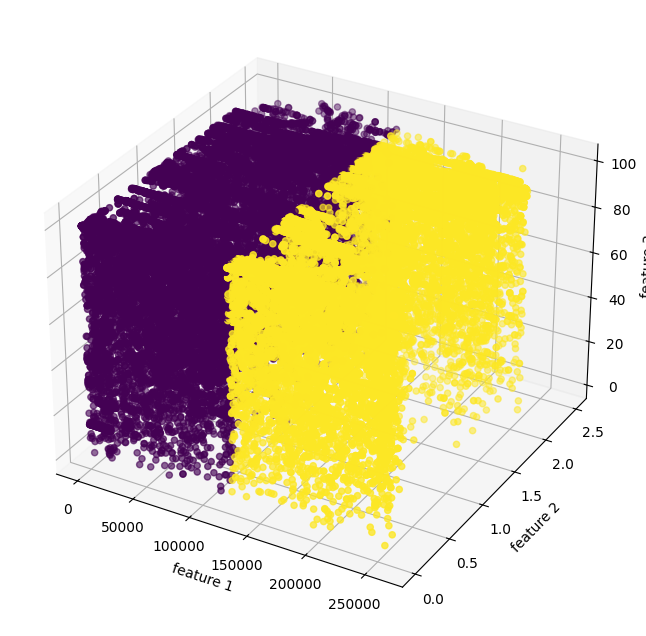

In [10]:
#plot the clusters in color
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
# plt.clf()
# ax = Axes3D(fig)
# plt.cla()
ax.scatter(datax, datay, dataz, c=labels_)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

plt.show()

In [11]:
from sklearn.decomposition import PCA
pcaData3 = pd.DataFrame(PCA(n_components=3).fit_transform(data)).sample(replace=False, frac=0.01)
pcaData3
pcaData2 = pd.DataFrame(PCA(n_components=2).fit_transform(data)).sample(replace=False, frac=0.01)
pcaData2

,0,1
2070188,35474.584429,-1.213928
26582,-96214.415401,-7.192195
2362169,65309.584377,0.323196
246103,123306.584065,7.876867
3179800,-94447.415403,-6.819408
...,...,...
3315199,40951.584398,-0.379669
479133,94184.584339,1.379508
153241,30444.583608,-1.465240
3594941,-103501.419403,40.180268


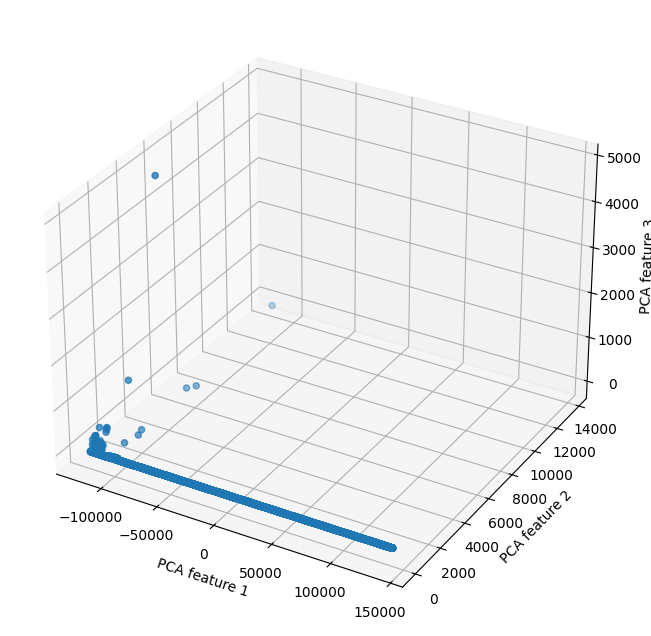

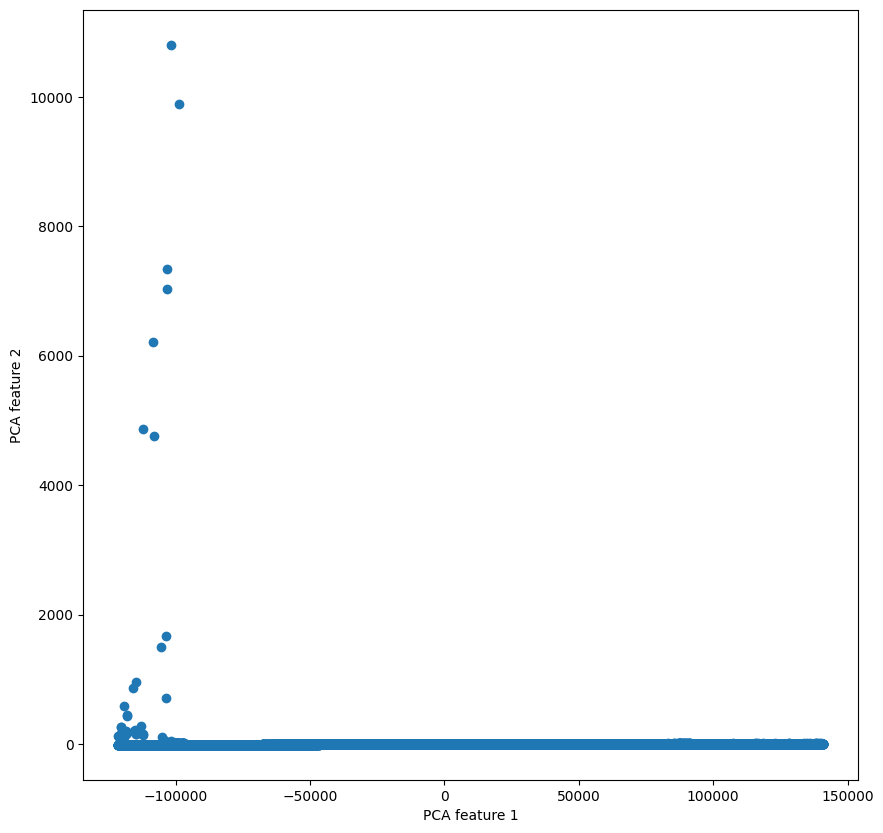

In [12]:
#pca plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pcaData3[0], pcaData3[1], pcaData3[2])

ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.show()

fig = plt.figure(1, figsize=(10, 10))

plt.scatter(pcaData2[0], pcaData2[1])

plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')

plt.show()

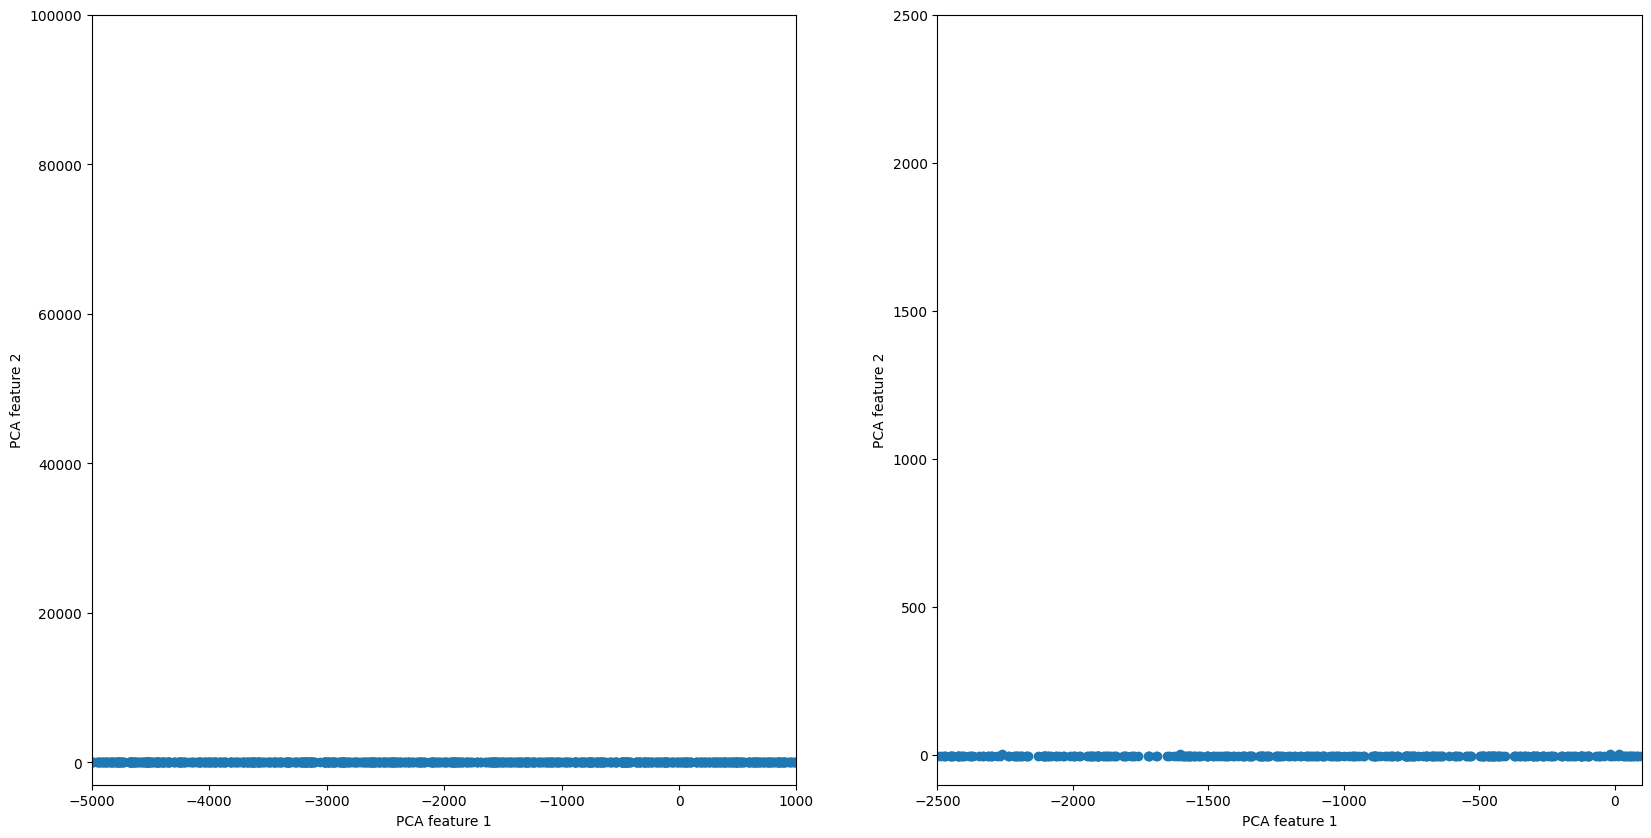

In [13]:
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(1,2,1)
ax.scatter(pcaData2[0], pcaData2[1])
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.xlim(-5000,1000)
plt.ylim(-3000, 100000)

ax = fig.add_subplot(1,2,2)
ax.scatter(pcaData2[0], pcaData2[1])
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.xlim(-2500,100)
plt.ylim(-100, 2500)
plt.show()


# Question 4
```
One of the simplest method to evaluate our result is calculate the Within Set Sum of Squared Errors (WSSSE), or simply, 'Sum of Squared Errors'. An error of a data point is defined as it's distance to the closest cluster center.
```

In [14]:
import time
t1 = time.time()
print(clusters.inertia_)
print("Time needed:", time.time()-t1)

5305637604045378.0
Time needed: 0.0



# Question 5
```
This is a good opportunity to use the given labels to get an intuitive sense of what went into these two clusters, by counting the labels within each cluster. Complete the following code that uses the model to assign each data point to a cluster, and counts occurrences of cluster and label pairs.

What do you think about the result?
```

In [15]:
labelsAndData['Cluster'] = labelsAndData[1].apply(lambda x: clusters.predict([x])[0])

In [16]:
labelsAndData.columns = ["Label","Data","Cluster"]
labelsAndData

,Label,Data,Cluster
0,,,
0,HTTP,"[9.0, 0.068909, 75.0, 0.0, 1.0, 0.068909, 96.0...",0
1,HTTP,"[10.0, 0.0, 2.0, 0.000131, 2.0, 0.000131, 1.0,...",0
2,HTTP,"[11.0, 0.064494, 75.0, 0.0, 1.0, 0.064494, 96....",0
3,HTTP,"[12.0, 0.064189, 75.0, 0.0, 1.0, 0.064189, 96....",0
4,HTTP,"[13.0, 0.063887, 75.0, 0.0, 1.0, 0.063887, 96....",0
...,...,...,...
3668517,Keylogging,"[81.0, 0.0, 19.0, 0.013165, 1.0, 0.013165, 19....",0
3668518,Keylogging,"[82.0, 0.0, 19.0, 0.000574, 1.0, 0.000574, 19....",0
3668519,Keylogging,"[84.0, 0.0, 19.0, 2.874302, 6.0, 2.874302, 19....",0


In [17]:
clusterLabelCount = labelsAndData.groupby(['Label', 'Cluster']).size().reset_index(name='Occurrences')
clusterLabelCount

,Label,Cluster,Occurrences
0,Data_Exfiltration,0,6
1,HTTP,0,2474
2,Keylogging,0,73
3,Normal,0,477
4,OS_Fingerprint,0,17914
5,Service_Scan,0,73168
6,TCP,0,840118
7,TCP,1,753062
8,UDP,0,998162
9,UDP,1,983068


# Question 6
```
Complete the function below to calculate the MSE of each model that is corresponding to each value of k.

Plot the results. From the obtained result, what is the best value for k? Why?
```

In [18]:
def clusteringScore(data, k, withCenters=False):
    clusters = KMeans(n_clusters=k, max_iter=10, init="random").fit(data)
    # calculate mean square error
    if withCenters is True:
        return (clusters.inertia_, len(clusters.cluster_centers_))
    return clusters.inertia_

In [19]:
k_vector = [2,5,11,20,30,50,70,100,120,200,300,400]

scores = [clusteringScore(data, k, withCenters=True) for k in k_vector]
for i, score in enumerate(scores):
     print("k = %3d, (effective nr. of clusters = %3d) WSSSE = %d" %(k_vector[i], score[1], score[0]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

k =   2, (effective nr. of clusters =   2) WSSSE = 5305631461805918
k =   5, (effective nr. of clusters =   5) WSSSE = 834968020499152
k =  11, (effective nr. of clusters =  11) WSSSE = 178184456021781
k =  20, (effective nr. of clusters =  20) WSSSE = 55579708268671
k =  30, (effective nr. of clusters =  30) WSSSE = 27357651321412
k =  50, (effective nr. of clusters =  50) WSSSE = 10351017170895
k =  70, (effective nr. of clusters =  70) WSSSE = 6883495000779
k = 100, (effective nr. of clusters = 100) WSSSE = 3419882607425
k = 120, (effective nr. of clusters = 120) WSSSE = 3655161152641
k = 200, (effective nr. of clusters = 200) WSSSE = 1387166514468
k = 300, (effective nr. of clusters = 300) WSSSE = 1038176129027
k = 400, (effective nr. of clusters = 400) WSSSE = 440294060967


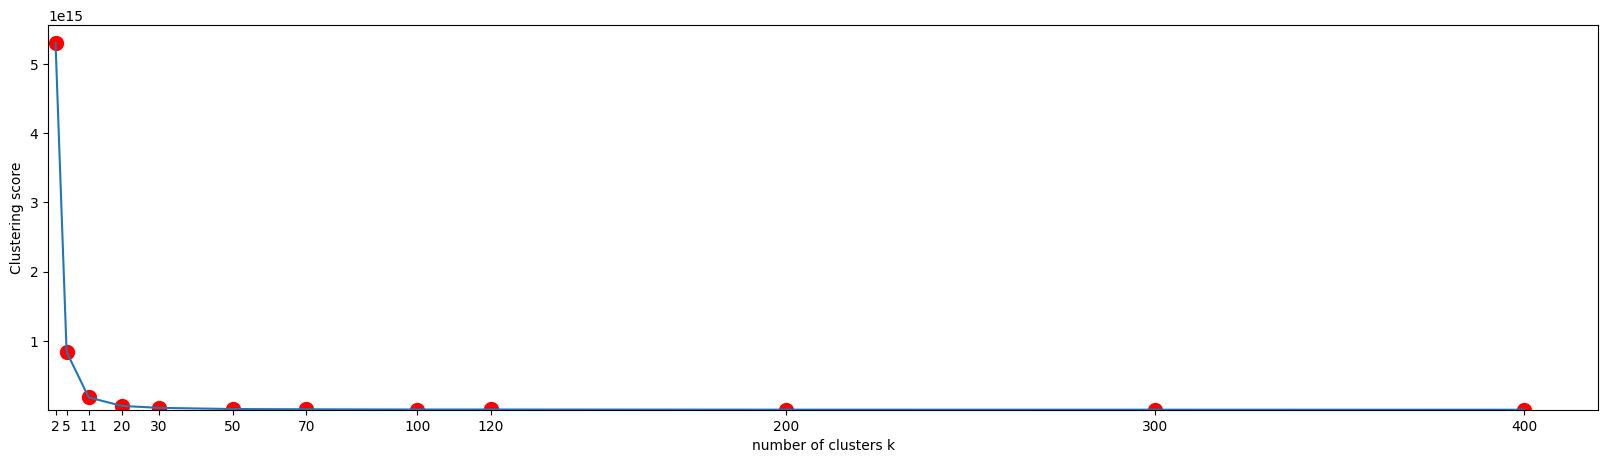

In [20]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[0] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([0, np.max(k_vector)*1.05, 0.85*np.min(_), 1.05*np.max(_)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering score")
plt.xticks(k_vector)
plt.show()

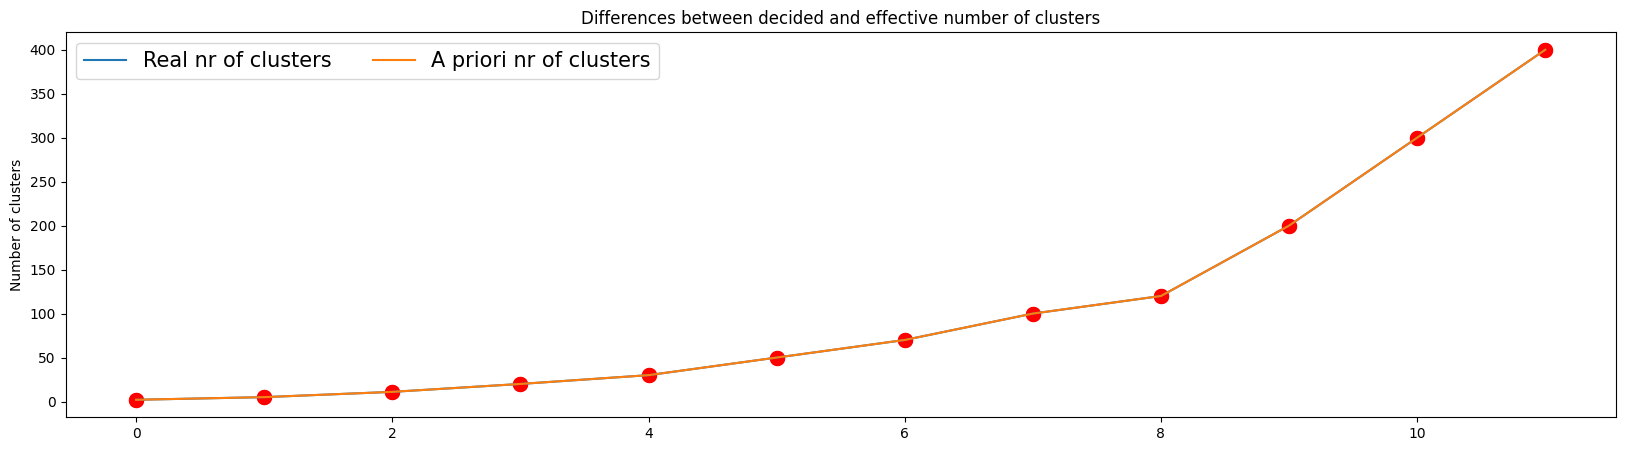

In [21]:
# plot results
plt.figure(figsize=(20, 5))
_ = [_[1] for _ in scores]
plt.scatter(np.arange(len(k_vector)), _, c="r", s=100)
plt.scatter(np.arange(len(k_vector)), k_vector, c="r", s=100)
plt.plot(np.arange(len(k_vector)), _, label="Real nr of clusters")
plt.plot(np.arange(len(k_vector)), k_vector, label="A priori nr of clusters")
plt.ylabel("Number of clusters")
plt.title("Differences between decided and effective number of clusters")
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=15)
plt.show()

# Question 7
```
Complete the code below to normalize the data. Print the first 5 lines of the new data.
```

In [22]:
def normalizeData(labelsAndData):
     # calculate means
    means = labelsAndData.apply(lambda x:x[1], axis=1).mean()
    # print(means)
    # calculate standard deviation of each feature
    stdevs = np.sqrt(labelsAndData.apply(lambda x : ((x[1]-means)**2), axis=1).mean())
    # print(stdevs)
    stdevs[stdevs==0] = 1
    def normalize(point):
        return (point[0],(point[1]-means)/stdevs)
    return labelsAndData.apply(lambda x: normalize(x), axis=1)
labelsAndDataNorm = normalizeData(labelsAndData)
normalizedData = labelsAndDataNorm.map(lambda x: x[1])
for i in normalizedData[0:5]:
    print(i)

C:\Users\savan\AppData\Local\Temp\ipykernel_2728\2757762958.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means = labelsAndData.apply(lambda x:x[1], axis=1).mean()
C:\Users\savan\AppData\Local\Temp\ipykernel_2728\2757762958.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stdevs = np.sqrt(labelsAndData.apply(lambda x : ((x[1]-means)**2), axis=1).mean())
C:\Users\savan\AppData\Local\Temp\ipykernel_2728\2757762958.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

[-1.60053538 -1.01807502 -0.30898728 -0.6858182  -1.79818236 -1.42459947
  0.19521543  0.23331748 -0.00329622 -1.54883817  0.0114036 ]
[-1.60052218e+00 -1.10381326e+00 -3.30111055e+00 -6.85729906e-01
 -9.55701491e-01 -1.46991591e+00 -5.03133284e+00 -7.38953162e-03
 -4.07858976e-03 -1.62282855e+00  1.14035970e-02]
[-1.60050899 -1.02356827 -0.30898728 -0.6858182  -1.79818236 -1.42750843
  0.19521543  0.24979532 -0.00329527 -1.55358325  0.0114036 ]
[-1.6004958  -1.02394776 -0.30898728 -0.6858182  -1.79818236 -1.42770939
  0.19521543  0.25101734 -0.00329524 -1.55391105  0.0114036 ]
[-1.6004826  -1.02432352 -0.30898728 -0.6858182  -1.79818236 -1.42790837
  0.19521543  0.25223886 -0.00329516 -1.55423563  0.0114036 ]



# Question 8
```
Using the new data, build different models with different values of k. Evaluate the results by plotting them and choose the best value of k.
```

In [23]:
normalizedData = normalizedData.apply(pd.Series)

In [24]:
k_vector = [60,70,80,90,100,110]
scores = [clusteringScore(normalizedData, k, withCenters=True) for k in k_vector]
for i, score in enumerate(scores):
    print("k = %3d, (effective nr. of clusters = %3d) WSSSE = %d" %(k_vector[i], score[1], score[0]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

k =  60, (effective nr. of clusters =  60) WSSSE = 9677279
k =  70, (effective nr. of clusters =  70) WSSSE = 7017900
k =  80, (effective nr. of clusters =  80) WSSSE = 6852488
k =  90, (effective nr. of clusters =  90) WSSSE = 6686136
k = 100, (effective nr. of clusters = 100) WSSSE = 5128537
k = 110, (effective nr. of clusters = 110) WSSSE = 6083354


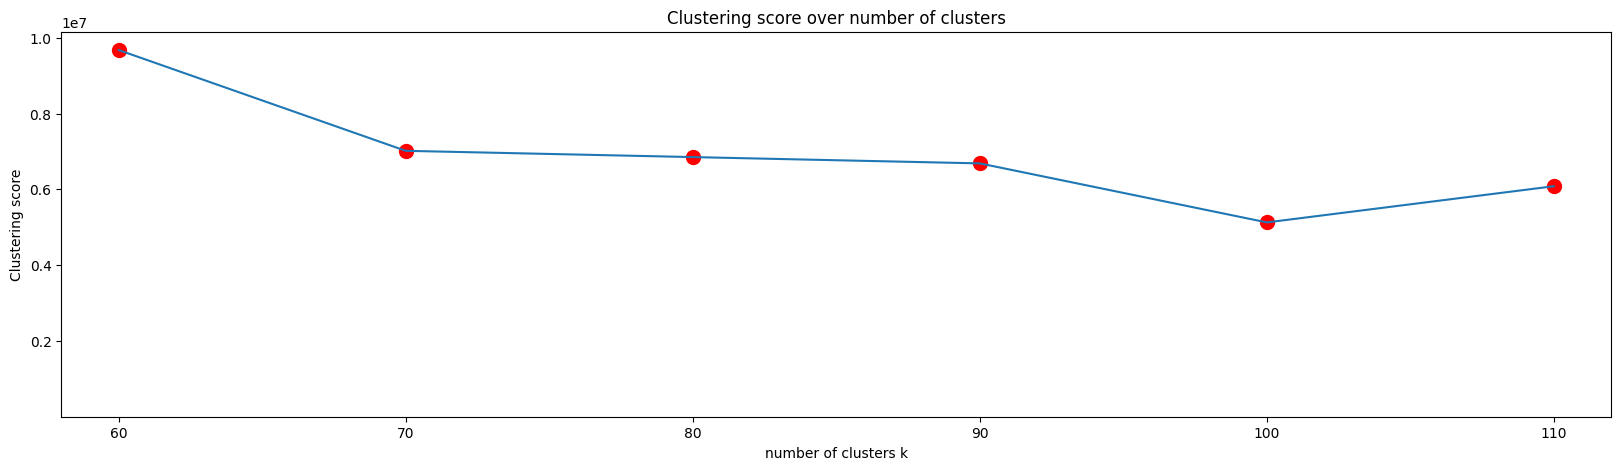

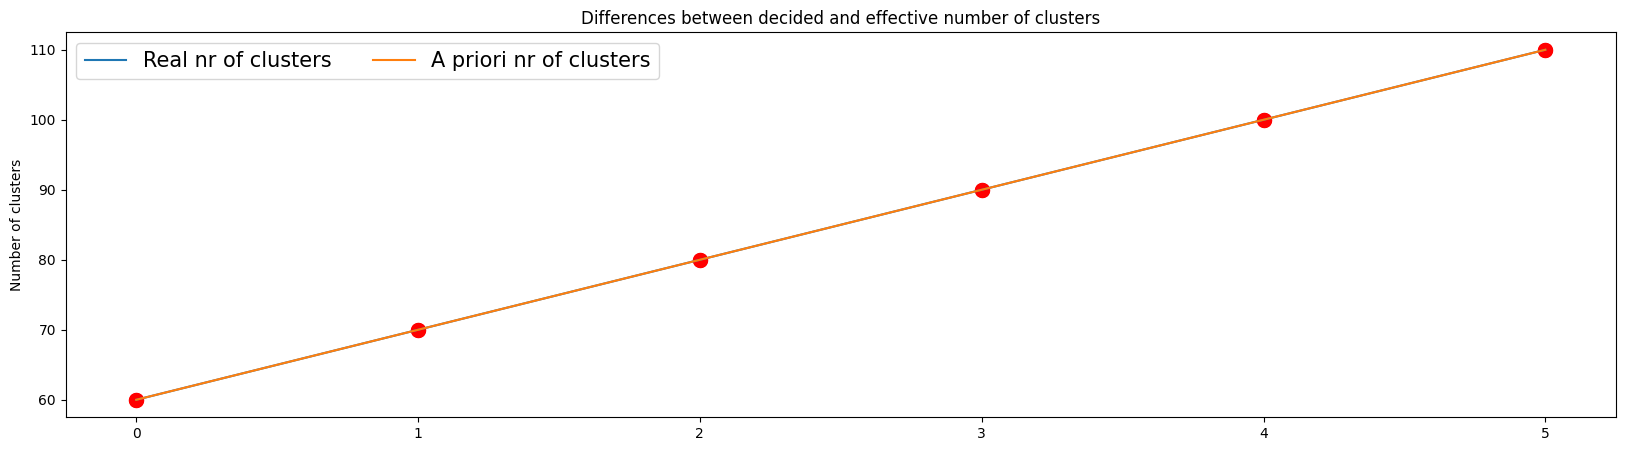

In [25]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[0] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([58,112, 0.85*np.min(scores), 1.05*np.max(scores)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering score")
plt.title("Clustering score over number of clusters")
plt.xticks(k_vector)
plt.show()

# plot results
plt.figure(figsize=(20,5))
_ = [_[1] for _ in scores]
plt.scatter(np.arange(len(k_vector)), _, c="r", s=100)
plt.scatter(np.arange(len(k_vector)), k_vector, c="r", s=100)
plt.plot(np.arange(len(k_vector)), _, label="Real nr of clusters")
plt.plot(np.arange(len(k_vector)), k_vector, label="A priori nr of clusters")
plt.ylabel("Number of clusters")
#plt.xticks(np.arange(len(k_vector)), k_vector)
plt.title("Differences between decided and effective number of clusters")
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=15)
#for i in np.arange(len(k_vector)):
#        plt.annotate(str(_[i]), i*0.98, _[i]*0.98)
#        plt.annotate(str(k_vector[i]), i*1.01, k_vector[i]*1.01)
plt.show()

# Question 9
```
Plot the clustering result to see the difference between before and after normalizing features. Discuss about the difference and explain why and if normalization was useful.
```

In [26]:
#let's use k as the best in the previous question = 80
clusters = KMeans(n_clusters=80, max_iter=10, init="random").fit(normalizedData)

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
#get three axis on the first three attributes
sampledNormalized = normalizedData.sample(replace=False, frac=0.01)
print((sampledNormalized))
datax_norm = sampledNormalized.apply(lambda x: x[0],axis=1)
datay_norm = sampledNormalized.apply(lambda x: x[1],axis=1)
dataz_norm = sampledNormalized.apply(lambda x: x[2],axis=1)
labels_norm = sampledNormalized.apply(lambda x: clusters.predict(x.values.reshape(1, -1)),axis=1)

               0         1         2         3         4         5         6   \
0                                                                               
2353638  0.749114  0.797509  0.715712 -0.685818 -0.113221 -0.050061  0.415281   
3216671 -0.759641 -1.077953  0.346821  2.057001  0.729260  1.224995  0.415281   
1107592  1.409586  1.110888 -2.850243 -0.685818  0.729260  0.561198 -4.371137   
1980783 -0.711537 -0.804192  0.715712  1.349143 -0.113221  0.733635  0.415281   
1419413 -1.393897  1.113200  0.715712 -0.685818  0.729260 -0.032133  0.415281   
...           ...       ...       ...       ...       ...       ...       ...   
2459005 -1.319393  0.425451 -2.358387 -0.685818 -1.798182 -0.897371  0.415281   
640640  -1.292399  0.866704  0.674724 -0.685818  0.729260  0.334698  0.360264   
66638   -0.740932 -1.103813  0.715712 -0.685818 -0.113221 -1.470002  0.415281   
2004993 -0.392120 -0.799592  0.715712  1.518866 -1.798182  0.807425  0.415281   
1183754 -1.044332 -0.072129 

In [28]:
pcaData = pd.DataFrame(PCA(n_components=3).fit_transform(normalizedData)).sample(replace=False, frac=0.01)

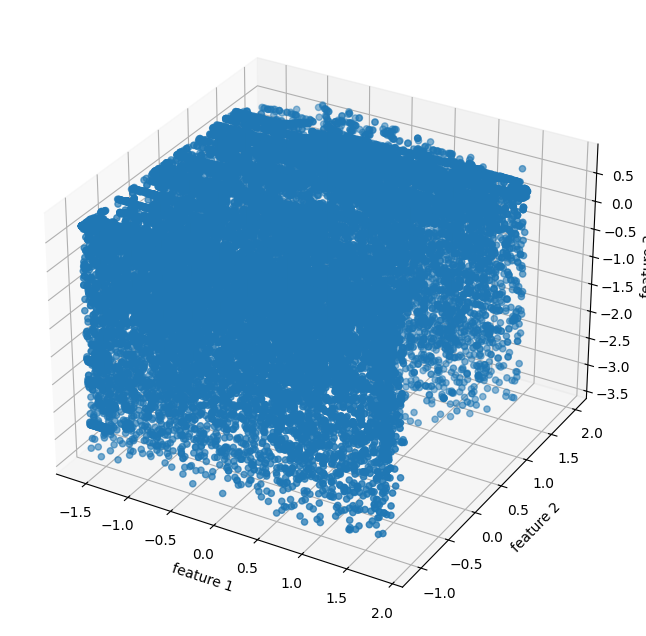

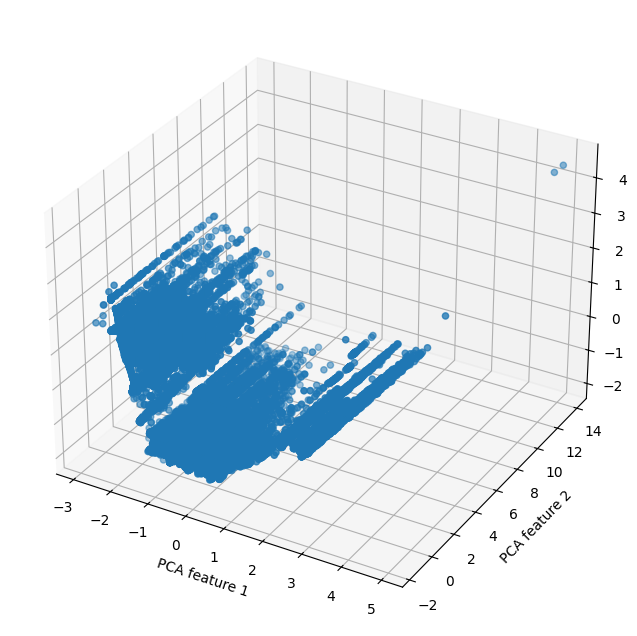

In [29]:
#plots
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(datax_norm, datay_norm, dataz_norm)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

#pca plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pcaData[0], pcaData[1], pcaData[2])

ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.show()

# Question 10
```
Calculate the number of distinct categorical features value (at index 1, 2, 3, 4, and 5). Then construct a new input data using one-hot encoding for these categorical features (don't throw away numerical features!).
```

In [30]:
raw_data.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,,,,,,,,,,,,,,,,,
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3668518,tcp,192.168.100.150,35064,192.168.100.3,22,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,1,Theft,Keylogging
3668518,3668519,tcp,192.168.100.150,35066,192.168.100.3,22,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,1,Theft,Keylogging
3668519,3668520,tcp,192.168.100.150,35070,192.168.100.3,22,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,1,Theft,Keylogging


In [31]:
feat1 = raw_data[1].unique()
feat2 = raw_data[2].unique()
feat3 = raw_data[3].unique()
feat4 = raw_data[4].unique()
feat5 = raw_data[5].unique()
print("feature 1: length = %d\nfeatures = \n%s\n" %(len(feat1), feat1))
print("\nfeature 2: length = %d\nfeatures = \n%s\n" %(len(feat2), feat2))
print("\nfeature 3: length = %d\nfeatures = \n%s\n" %(len(feat3), feat3))
print("\nfeature 4: length = %d\nfeatures = \n%s\n" %(len(feat4), feat4))
print("\nfeature 5: length = %d\nfeatures = \n%s\n" %(len(feat5), feat5))

feature 1: length = 5
features = 
['tcp' 'arp' 'udp' 'icmp' 'ipv6-icmp']


feature 2: length = 21
features = 
['192.168.100.147' '192.168.100.7' '192.168.100.148' '192.168.100.6'
 '192.168.100.149' '192.168.100.150' '192.168.100.5' '192.168.100.3'
 '192.168.100.1' '192.168.100.4' '192.168.100.27'
 'fe80::250:56ff:febe:254' '192.168.100.46' 'fe80::250:56ff:febe:26db'
 'fe80::250:56ff:febe:e9d9' 'fe80::c0c0:aa20:45b9:bdd9'
 'fe80::250:56ff:febe:89ee' 'fe80::2c6a:ff9b:7e14:166a'
 'fe80::250:56ff:febe:bf1a' 'fe80::250:56ff:febe:c038' '192.168.100.55']


feature 3: length = 131078
features = 
[49960 -1 49962 ... '0x0008' '0x000d' '0x0011']


feature 4: length = 84
features = 
['192.168.100.7' '192.168.100.147' '192.168.100.6' '192.168.100.148'
 '192.168.100.5' '192.168.100.3' '192.168.100.149' '192.168.100.150'
 '192.168.100.4' '27.124.125.250' '192.168.100.1' '192.168.100.27'
 '192.168.217.2' '192.168.100.255' '8.8.8.8' 'ff02::1' '255.255.255.255'
 '13.55.154.73' '192.168.100.55' '184.85.2

In [32]:
from collections import defaultdict
f1nonreduced = raw_data.apply(lambda x : x[1], axis=1).map(lambda x : (x, 1))
f2nonreduced = raw_data.apply(lambda x : x[2], axis=1).map(lambda x : (x, 1))
f3nonreduced = raw_data.apply(lambda x : x[3], axis=1).map(lambda x : (x, 1))
f4nonreduced = raw_data.apply(lambda x : x[4], axis=1).map(lambda x : (x, 1))
f5nonreduced = raw_data.apply(lambda x : x[5], axis=1).map(lambda x : (x, 1))

In [33]:
f1 = defaultdict(int)
for key, value in f1nonreduced:
    f1[key] += value
f1 = pd.DataFrame(f1.items())
f1 = f1.sort_values(by=1, ascending=False)
print(f1)
f2 = defaultdict(int)
for key, value in f2nonreduced:
    f2[key] += value
f2 = pd.DataFrame(f2.items())
f2 = f2.sort_values(by=1, ascending=False)
print(f2)
f3 = defaultdict(int)
for key, value in f3nonreduced:
    f3[key] += value
f3 = pd.DataFrame(f3.items())
f3 = f3.sort_values(by=1, ascending=False)
print(f3)
f4 = defaultdict(int)
for key, value in f4nonreduced:
    f4[key] += value
f4 = pd.DataFrame(f4.items())
f4 = f4.sort_values(by=1, ascending=False)
print(f4)
f5 = defaultdict(int)
for key, value in f5nonreduced:
    f5[key] += value
f5 = pd.DataFrame(f5.items())
f5 = f5.sort_values(by=1, ascending=False)
print(f5)

           0        1
2        udp  1996437
0        tcp  1662812
3       icmp     9052
1        arp      213
4  ipv6-icmp        8
                            0       1
0             192.168.100.147  950966
2             192.168.100.148  923290
5             192.168.100.150  890262
4             192.168.100.149  890146
7               192.168.100.3    8281
6               192.168.100.5    5118
3               192.168.100.6     327
1               192.168.100.7      43
9               192.168.100.4      19
8               192.168.100.1      16
12             192.168.100.46      15
10             192.168.100.27      14
11    fe80::250:56ff:febe:254       6
15  fe80::c0c0:aa20:45b9:bdd9       4
20             192.168.100.55       3
13   fe80::250:56ff:febe:26db       2
14   fe80::250:56ff:febe:e9d9       2
16   fe80::250:56ff:febe:89ee       2
17  fe80::2c6a:ff9b:7e14:166a       2
18   fe80::250:56ff:febe:bf1a       2
19   fe80::250:56ff:febe:c038       2
             0     1
75224   0x0

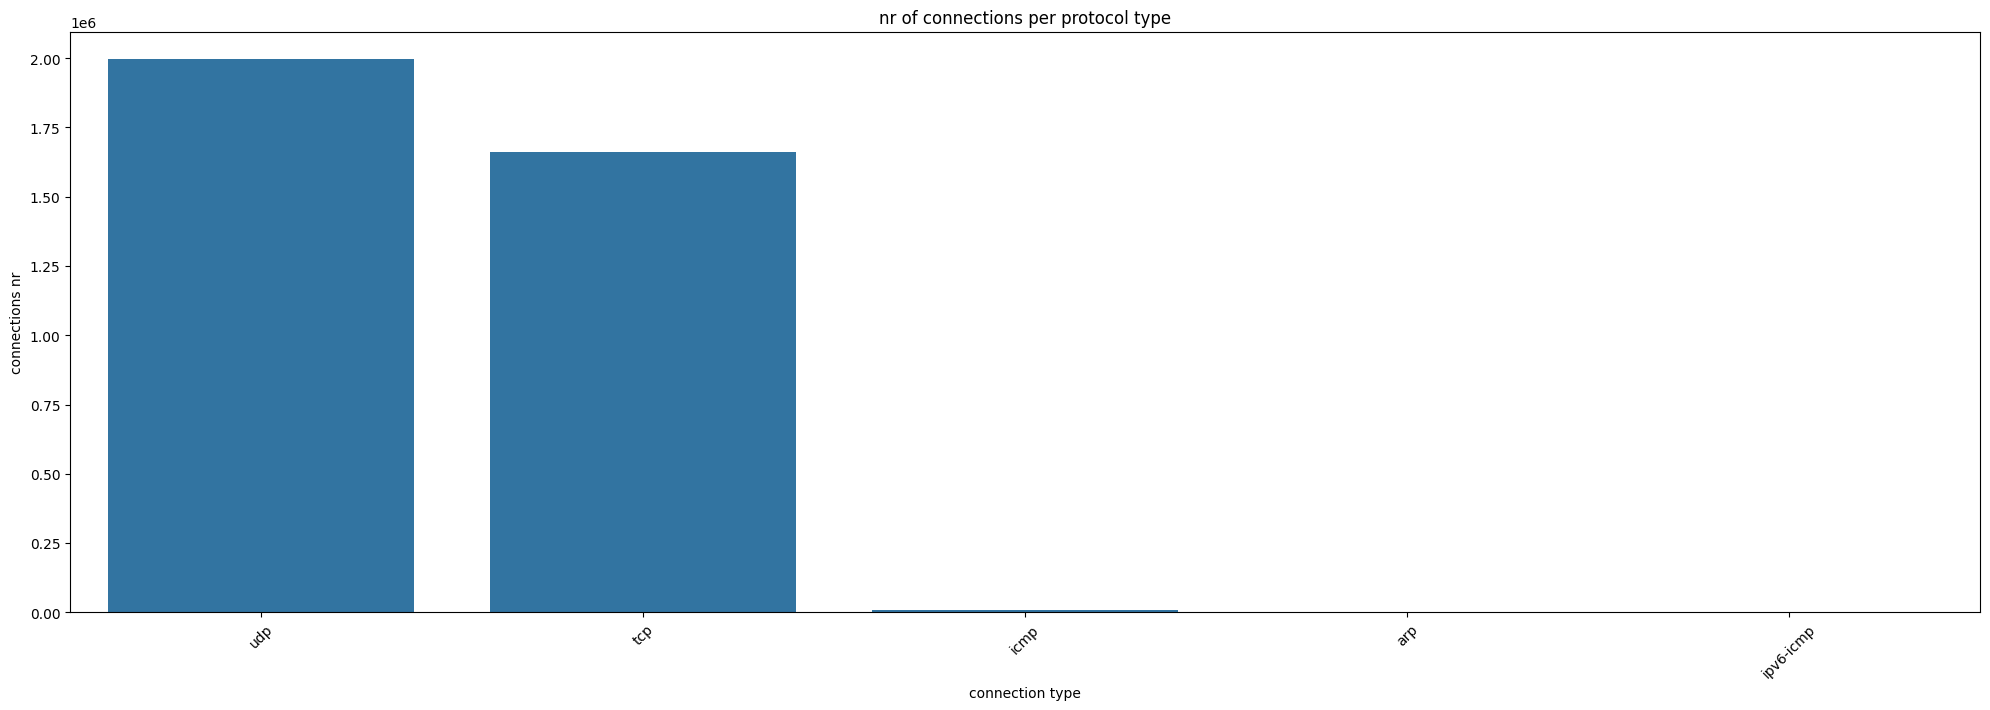

In [34]:
#plotting
a = plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.barplot(x=np.arange(len(f1)), y=f1[1])
plt.xticks(np.arange(len(f1)), f1[0], rotation=45)
plt.title("nr of connections per protocol type")
plt.xlabel("connection type")
plt.ylabel("connections nr")

plt.tight_layout()

plt.show()

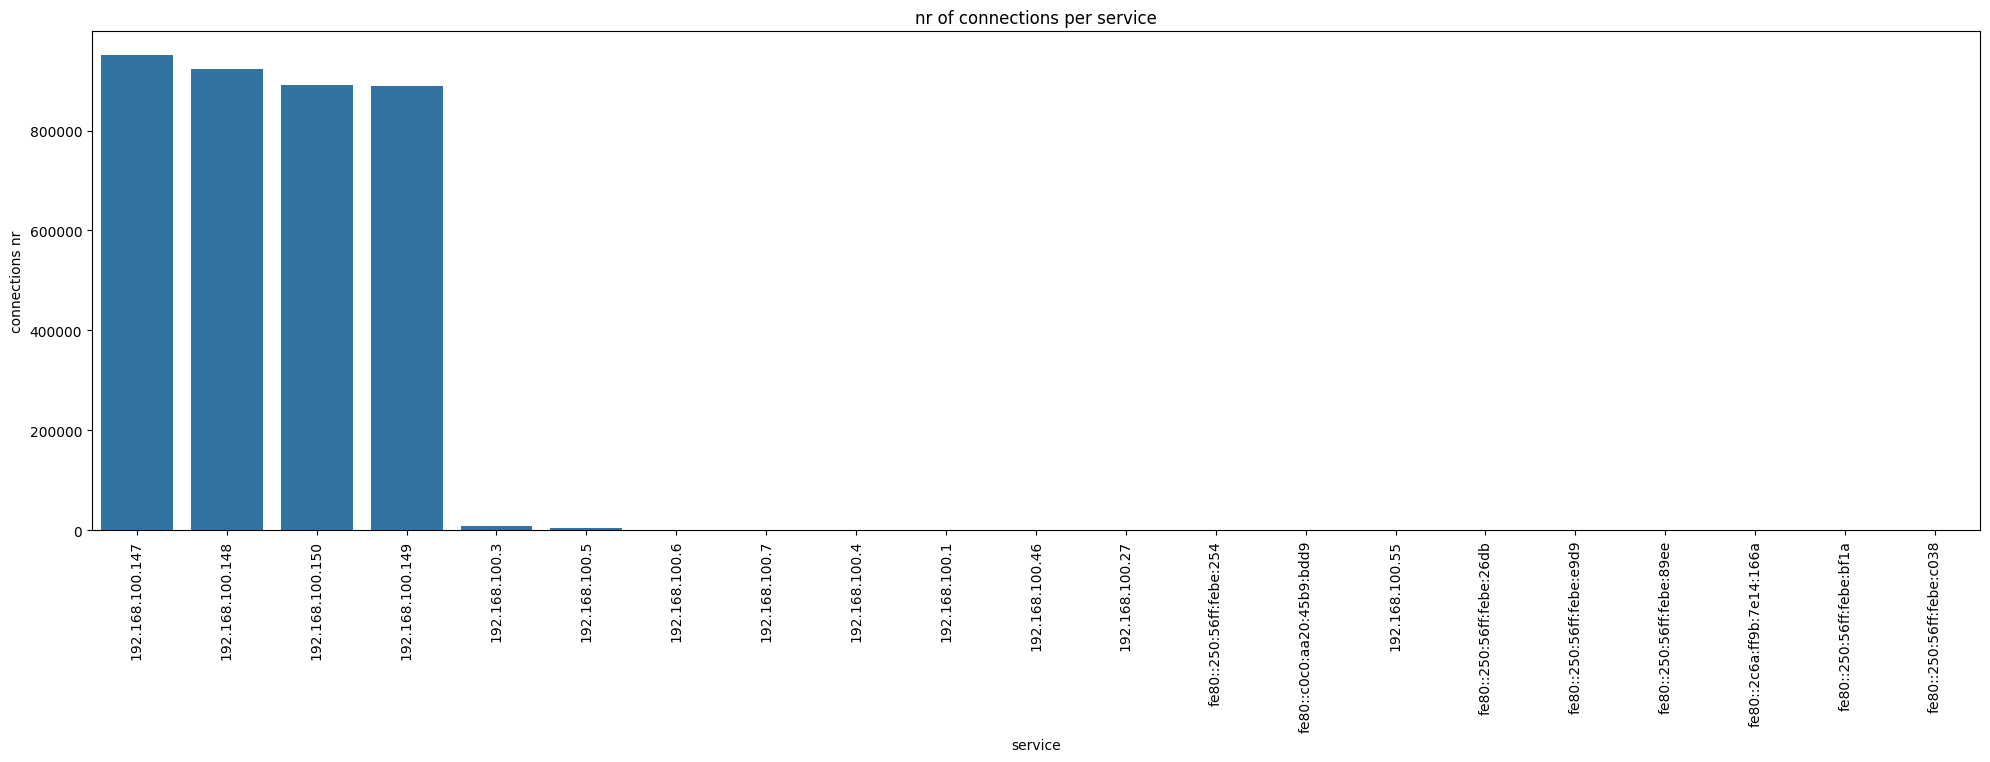

In [35]:
a = plt.figure(figsize=(20,20))
plt.subplot(3,1,2)
sns.barplot(x=np.arange(len(f2)), y=f2[1])
plt.xticks(np.arange(len(f2)), f2[0], rotation="vertical")
plt.title("nr of connections per service")
plt.xlabel("service")
plt.ylabel("connections nr")
plt.tight_layout()

plt.show()

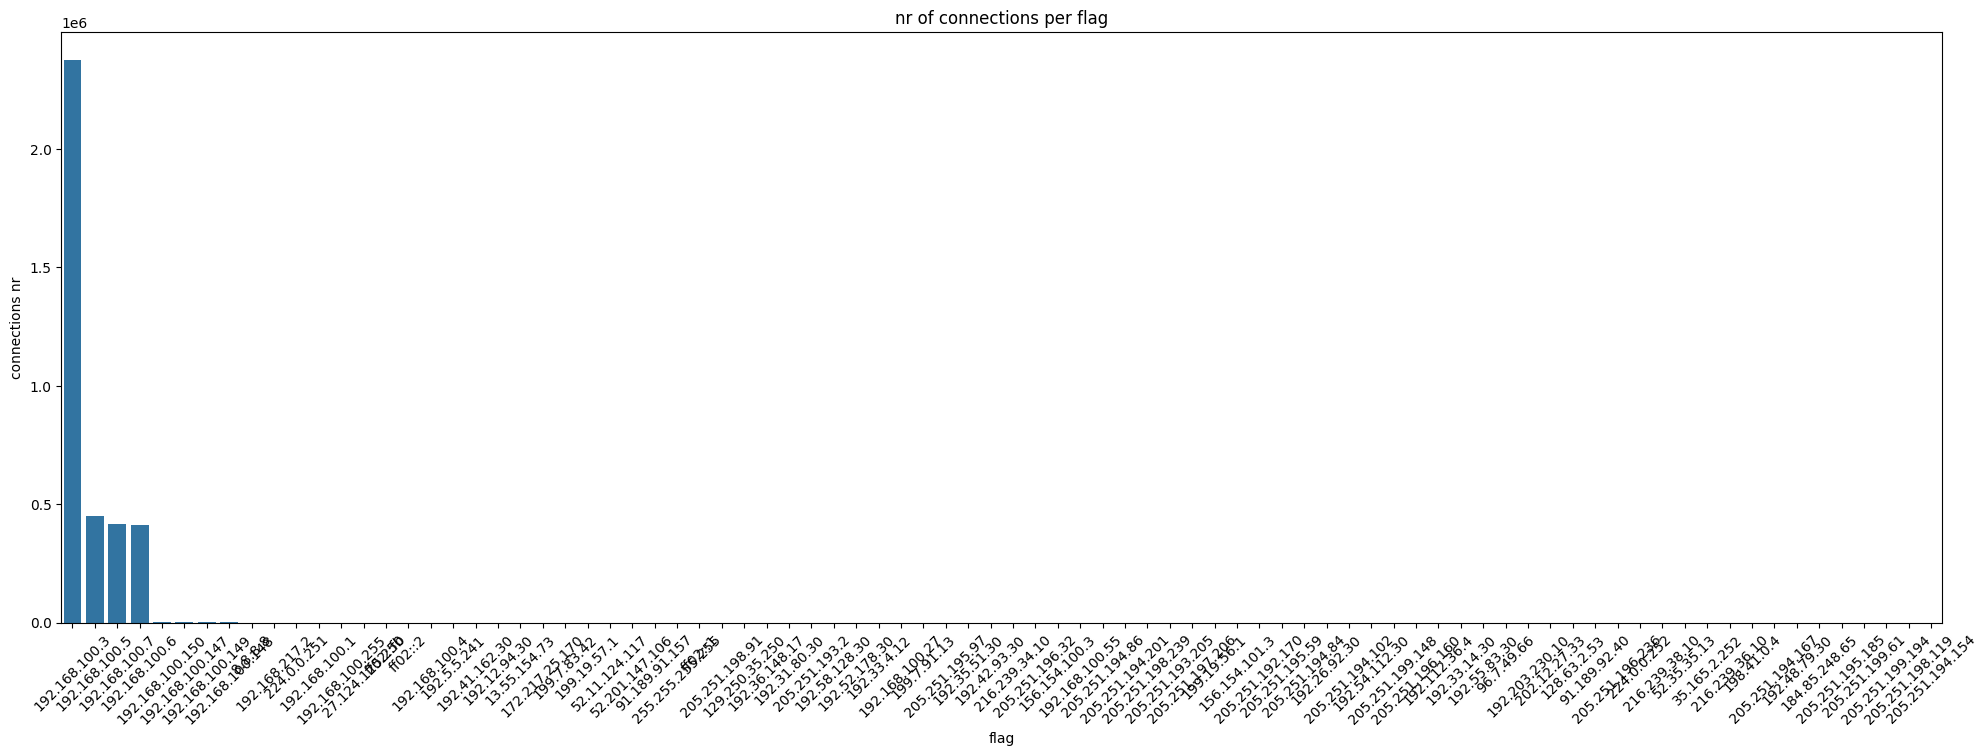

In [36]:
a = plt.figure(figsize=(20,20))
plt.subplot(3,1,3)
sns.barplot(x=np.arange(len(f4)), y=f4[1])
plt.xticks(np.arange(len(f4)), f4[0], rotation=45)
plt.title("nr of connections per flag")
plt.xlabel("flag")
plt.ylabel("connections nr")

plt.tight_layout()

plt.show()

In [37]:
bits1=pd.get_dummies(raw_data[1])
bits1 = pd.DataFrame(np.packbits(bits1,axis=1))
bits1 = bits1.apply(lambda row: ''.join(row.values.astype(str)), axis=1).apply(lambda x: int(x))
print(bits1)

0           16
1          128
2           16
3           16
4           16
          ... 
3668517     16
3668518     16
3668519     16
3668520     16
3668521    128
Length: 3668522, dtype: int64


In [38]:
bits2=pd.get_dummies(raw_data[2])
bits2 = pd.DataFrame(np.packbits(bits2,axis=1))
bits2 = bits2.apply(lambda row: ''.join(row.values.astype(str)), axis=1).apply(lambda x: int(x))
print(bits2)

0          6400
1            80
2          6400
3          6400
4          6400
           ... 
3668517     800
3668518     800
3668519     800
3668520     200
3668521     200
Length: 3668522, dtype: int64


In [39]:
bits4=pd.get_dummies(raw_data[4])
bits4 = pd.DataFrame(np.packbits(bits4,axis=1))
bits4 = bits4.apply(lambda row: ''.join(row.values.astype(str)), axis=1).apply(lambda x: int(x))
print(bits4)

0            400000000
1          32000000000
2            400000000
3            400000000
4            400000000
              ...     
3668517    12800000000
3668518    12800000000
3668519    12800000000
3668520     4000000000
3668521     8000000000
Length: 3668522, dtype: int64


In [40]:
bits3=raw_data.apply(lambda x : x[3], axis=1).apply(str).apply(int, base=16)
bits5=raw_data.apply(lambda x : x[5], axis=1).apply(str).apply(int, base=16)
print(bits3)
print(bits5)

0
0          301408
1              -1
2          301410
3          301412
4          301414
            ...  
3668517    217188
3668518    217190
3668519    217200
3668520    274433
3668521        -1
Length: 3668522, dtype: int64
0
0            128
1             -1
2            128
3            128
4            128
           ...  
3668517       34
3668518       34
3668519       34
3668520    17459
3668521       -1
Length: 3668522, dtype: int64


In [41]:
raw_data[1] = bits1
raw_data[2] = bits2
raw_data[3] = bits3
raw_data[4] = bits4
raw_data[5] = bits5
raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,,,,,,,,,,,,,,,,,
0,1,16,6400,301408,400000000,128,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,128,80,-1,32000000000,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,16,6400,301410,400000000,128,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,16,6400,301412,400000000,128,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,16,6400,301414,400000000,128,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3668518,16,800,217188,12800000000,34,81,0.000000,19,0.013165,1,0.013165,19,151.917969,151.917969,0.013165,1,Theft,Keylogging
3668518,3668519,16,800,217190,12800000000,34,82,0.000000,19,0.000574,1,0.000574,19,3484.320557,3484.320557,0.000574,1,Theft,Keylogging
3668519,3668520,16,800,217200,12800000000,34,84,0.000000,19,2.874302,6,2.874302,19,5.566569,4.522837,2.874302,1,Theft,Keylogging


In [42]:
def parseLineWithHotEncoding(line):
    # label is the last column
    # print(line)
    label = line[17]
    vector = line[0:17]
    # construct the new vector
    # convert each value from string to float
    vector = np.array(vector, dtype=float)
    return (label, vector)

labelsAndData = raw_data.apply(parseLineWithHotEncoding,axis=1)

In [43]:
labelsAndData = labelsAndData.apply(pd.Series)
labelsAndData

,0,1
0,,
0,DoS,"[1.0, 16.0, 6400.0, 301408.0, 400000000.0, 128..."
1,DoS,"[2.0, 128.0, 80.0, -1.0, 32000000000.0, -1.0, ..."
2,DoS,"[3.0, 16.0, 6400.0, 301410.0, 400000000.0, 128..."
3,DoS,"[4.0, 16.0, 6400.0, 301412.0, 400000000.0, 128..."
4,DoS,"[5.0, 16.0, 6400.0, 301414.0, 400000000.0, 128..."
...,...,...
3668517,Theft,"[3668518.0, 16.0, 800.0, 217188.0, 12800000000..."
3668518,Theft,"[3668519.0, 16.0, 800.0, 217190.0, 12800000000..."
3668519,Theft,"[3668520.0, 16.0, 800.0, 217200.0, 12800000000..."


In [44]:
def normalizeData(labelsAndData):
     # calculate means
    means = labelsAndData.apply(lambda x : x[1], axis=1).mean()
    # print(means)
    # calculate standard deviation of each feature
    stdevs = np.sqrt(labelsAndData.apply(lambda x : ((x[1]-means)**2), axis=1).mean())
    # print(stdevs)
    stdevs[stdevs==0] = 1
    def normalize(point):
        return (point[0],(point[1]-means)/stdevs)
    return labelsAndData.apply(lambda x: normalize(x), axis=1)
labelsAndDataNorm = normalizeData(labelsAndData)
normalizedData = labelsAndDataNorm.map(lambda x:x[1])

In [45]:
normalizedData = normalizedData.apply(pd.Series)
normalizedData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,,
0,-1.732050,0.874893,1.549149,0.784106,-1.510028,-0.082887,-1.600535,-1.018075,-0.308987,-0.685818,-1.798182,-1.424599,0.195215,0.233317,-0.003296,-1.548838,0.011404
1,-1.732049,24.047128,-1.371852,-1.625003,4.118850,-0.090167,-1.600522,-1.103813,-3.301111,-0.685730,-0.955701,-1.469916,-5.031333,-0.007390,-0.004079,-1.622829,0.011404
2,-1.732048,0.874893,1.549149,0.784122,-1.510028,-0.082887,-1.600509,-1.023568,-0.308987,-0.685818,-1.798182,-1.427508,0.195215,0.249795,-0.003295,-1.553583,0.011404
3,-1.732048,0.874893,1.549149,0.784138,-1.510028,-0.082887,-1.600496,-1.023948,-0.308987,-0.685818,-1.798182,-1.427709,0.195215,0.251017,-0.003295,-1.553911,0.011404
4,-1.732047,0.874893,1.549149,0.784154,-1.510028,-0.082887,-1.600483,-1.024324,-0.308987,-0.685818,-1.798182,-1.427908,0.195215,0.252239,-0.003295,-1.554236,0.011404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,1.732047,0.874893,-1.039080,0.110951,0.698773,-0.088192,-1.599585,-1.103813,-2.604315,-0.676945,-1.798182,-1.461328,-4.041039,2.512455,0.205596,-1.615824,0.011404
3668518,1.732048,0.874893,-1.039080,0.110967,0.698773,-0.088192,-1.599572,-1.103813,-2.604315,-0.685431,-1.798182,-1.469624,-4.041039,57.786613,4.804916,-1.622590,0.011404
3668519,1.732048,0.874893,-1.039080,0.111047,0.698773,-0.088192,-1.599546,-1.103813,-2.604315,1.251451,2.414222,0.423818,-4.041039,0.084942,0.002164,-0.078304,0.011404


# Question 11
```
Using the new data, cluster the connections with different values of k. Evaluate the results and choose the best value of as previous questions.
```

In [46]:
def clusteringScore(data, k, withCenters=False):
    clusters = KMeans(n_clusters=k, max_iter=10, init="random").fit(data)
    # calculate mean square error
    if withCenters is True:
        return (clusters.inertia_, len(clusters.cluster_centers_))
    return clusters.inertia_

In [47]:
k_vector = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
scores = [clusteringScore(normalizedData, k, withCenters=True) for k in k_vector]
for i, score in enumerate(scores):
    print("k = %3d, (effective nr. of clusters = %3d) WSSSE = %d" %(k_vector[i], score[1], score[0]))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

k =  20, (effective nr. of clusters =  20) WSSSE = 26178547
k =  30, (effective nr. of clusters =  30) WSSSE = 20036087
k =  40, (effective nr. of clusters =  40) WSSSE = 19855830
k =  50, (effective nr. of clusters =  50) WSSSE = 14964420
k =  60, (effective nr. of clusters =  60) WSSSE = 16067979
k =  70, (effective nr. of clusters =  70) WSSSE = 15147589
k =  80, (effective nr. of clusters =  80) WSSSE = 14742850
k =  90, (effective nr. of clusters =  90) WSSSE = 13553218
k = 100, (effective nr. of clusters = 100) WSSSE = 13530734
k = 110, (effective nr. of clusters = 110) WSSSE = 12467004
k = 120, (effective nr. of clusters = 120) WSSSE = 13070474
k = 130, (effective nr. of clusters = 130) WSSSE = 9401507
k = 140, (effective nr. of clusters = 140) WSSSE = 10120681
k = 150, (effective nr. of clusters = 150) WSSSE = 9738835
k = 160, (effective nr. of clusters = 160) WSSSE = 9742161


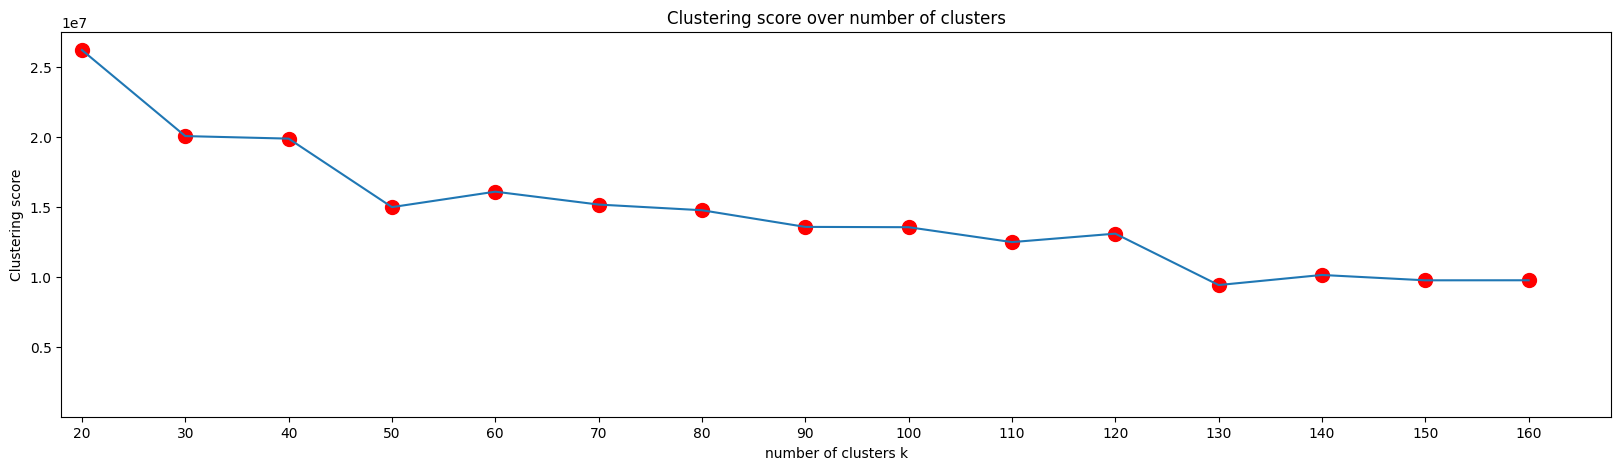

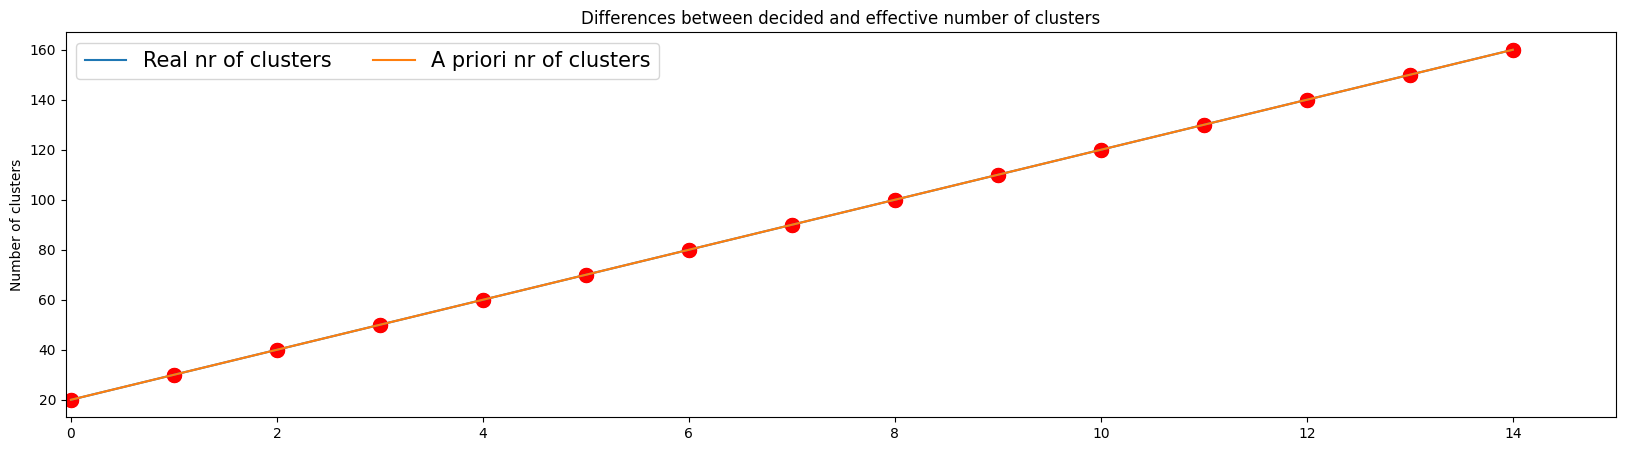

In [48]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[0] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([18, 1.05*np.max(k_vector), 0.85*np.min(scores), 1.05*np.max(scores)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering score")
plt.title("Clustering score over number of clusters")
plt.xticks(k_vector)
plt.show()

# plot results
plt.figure(figsize=(20,5))
_ = [_[1] for _ in scores]
plt.scatter(np.arange(len(k_vector)), _, c="r", s=100)
plt.scatter(np.arange(len(k_vector)), k_vector, c="r", s=100)
plt.plot(np.arange(len(k_vector)), _, label="Real nr of clusters")
plt.plot(np.arange(len(k_vector)), k_vector, label="A priori nr of clusters")
plt.ylabel("Number of clusters")
plt.xlim([-0.05, np.max(len(k_vector))])
#plt.xticks(np.arange(len(k_vector)), k_vector)
plt.title("Differences between decided and effective number of clusters")
plt.legend(ncol=2, loc='upper left', frameon=True, fontsize=15)
#for i in np.arange(len(k_vector)):
#        plt.annotate(str(_[i]), i*0.98, _[i]*0.98)
#        plt.annotate(str(k_vector[i]), i*1.01, k_vector[i]*1.01)
plt.show()

# Question 12
```
Build your model with the best value of k in your opinion. Then, detect the anomalous connections in our data. Plot and discuss your result.
```

In [59]:
bestK = 130

In [60]:
clusters = KMeans(n_clusters=bestK, max_iter=10, init="random").fit(normalizedData)

print("Initial k clusters:", bestK)
print("Effective clusters:", len(clusters.cluster_centers_))

C:\Users\savan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initial k clusters: 130
Effective clusters: 130


In [61]:
i = 0
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))
def error(prediction, point):
    global i
    closest_center = clusters.cluster_centers_[prediction[i]]
    i += 1
    return euclidean_distance(closest_center, point)

In [62]:
predictions = clusters.predict(normalizedData)
ordered = normalizedData.apply(lambda x : (error(predictions, x), x), axis=1).sort_values(key=0, ascending=False)

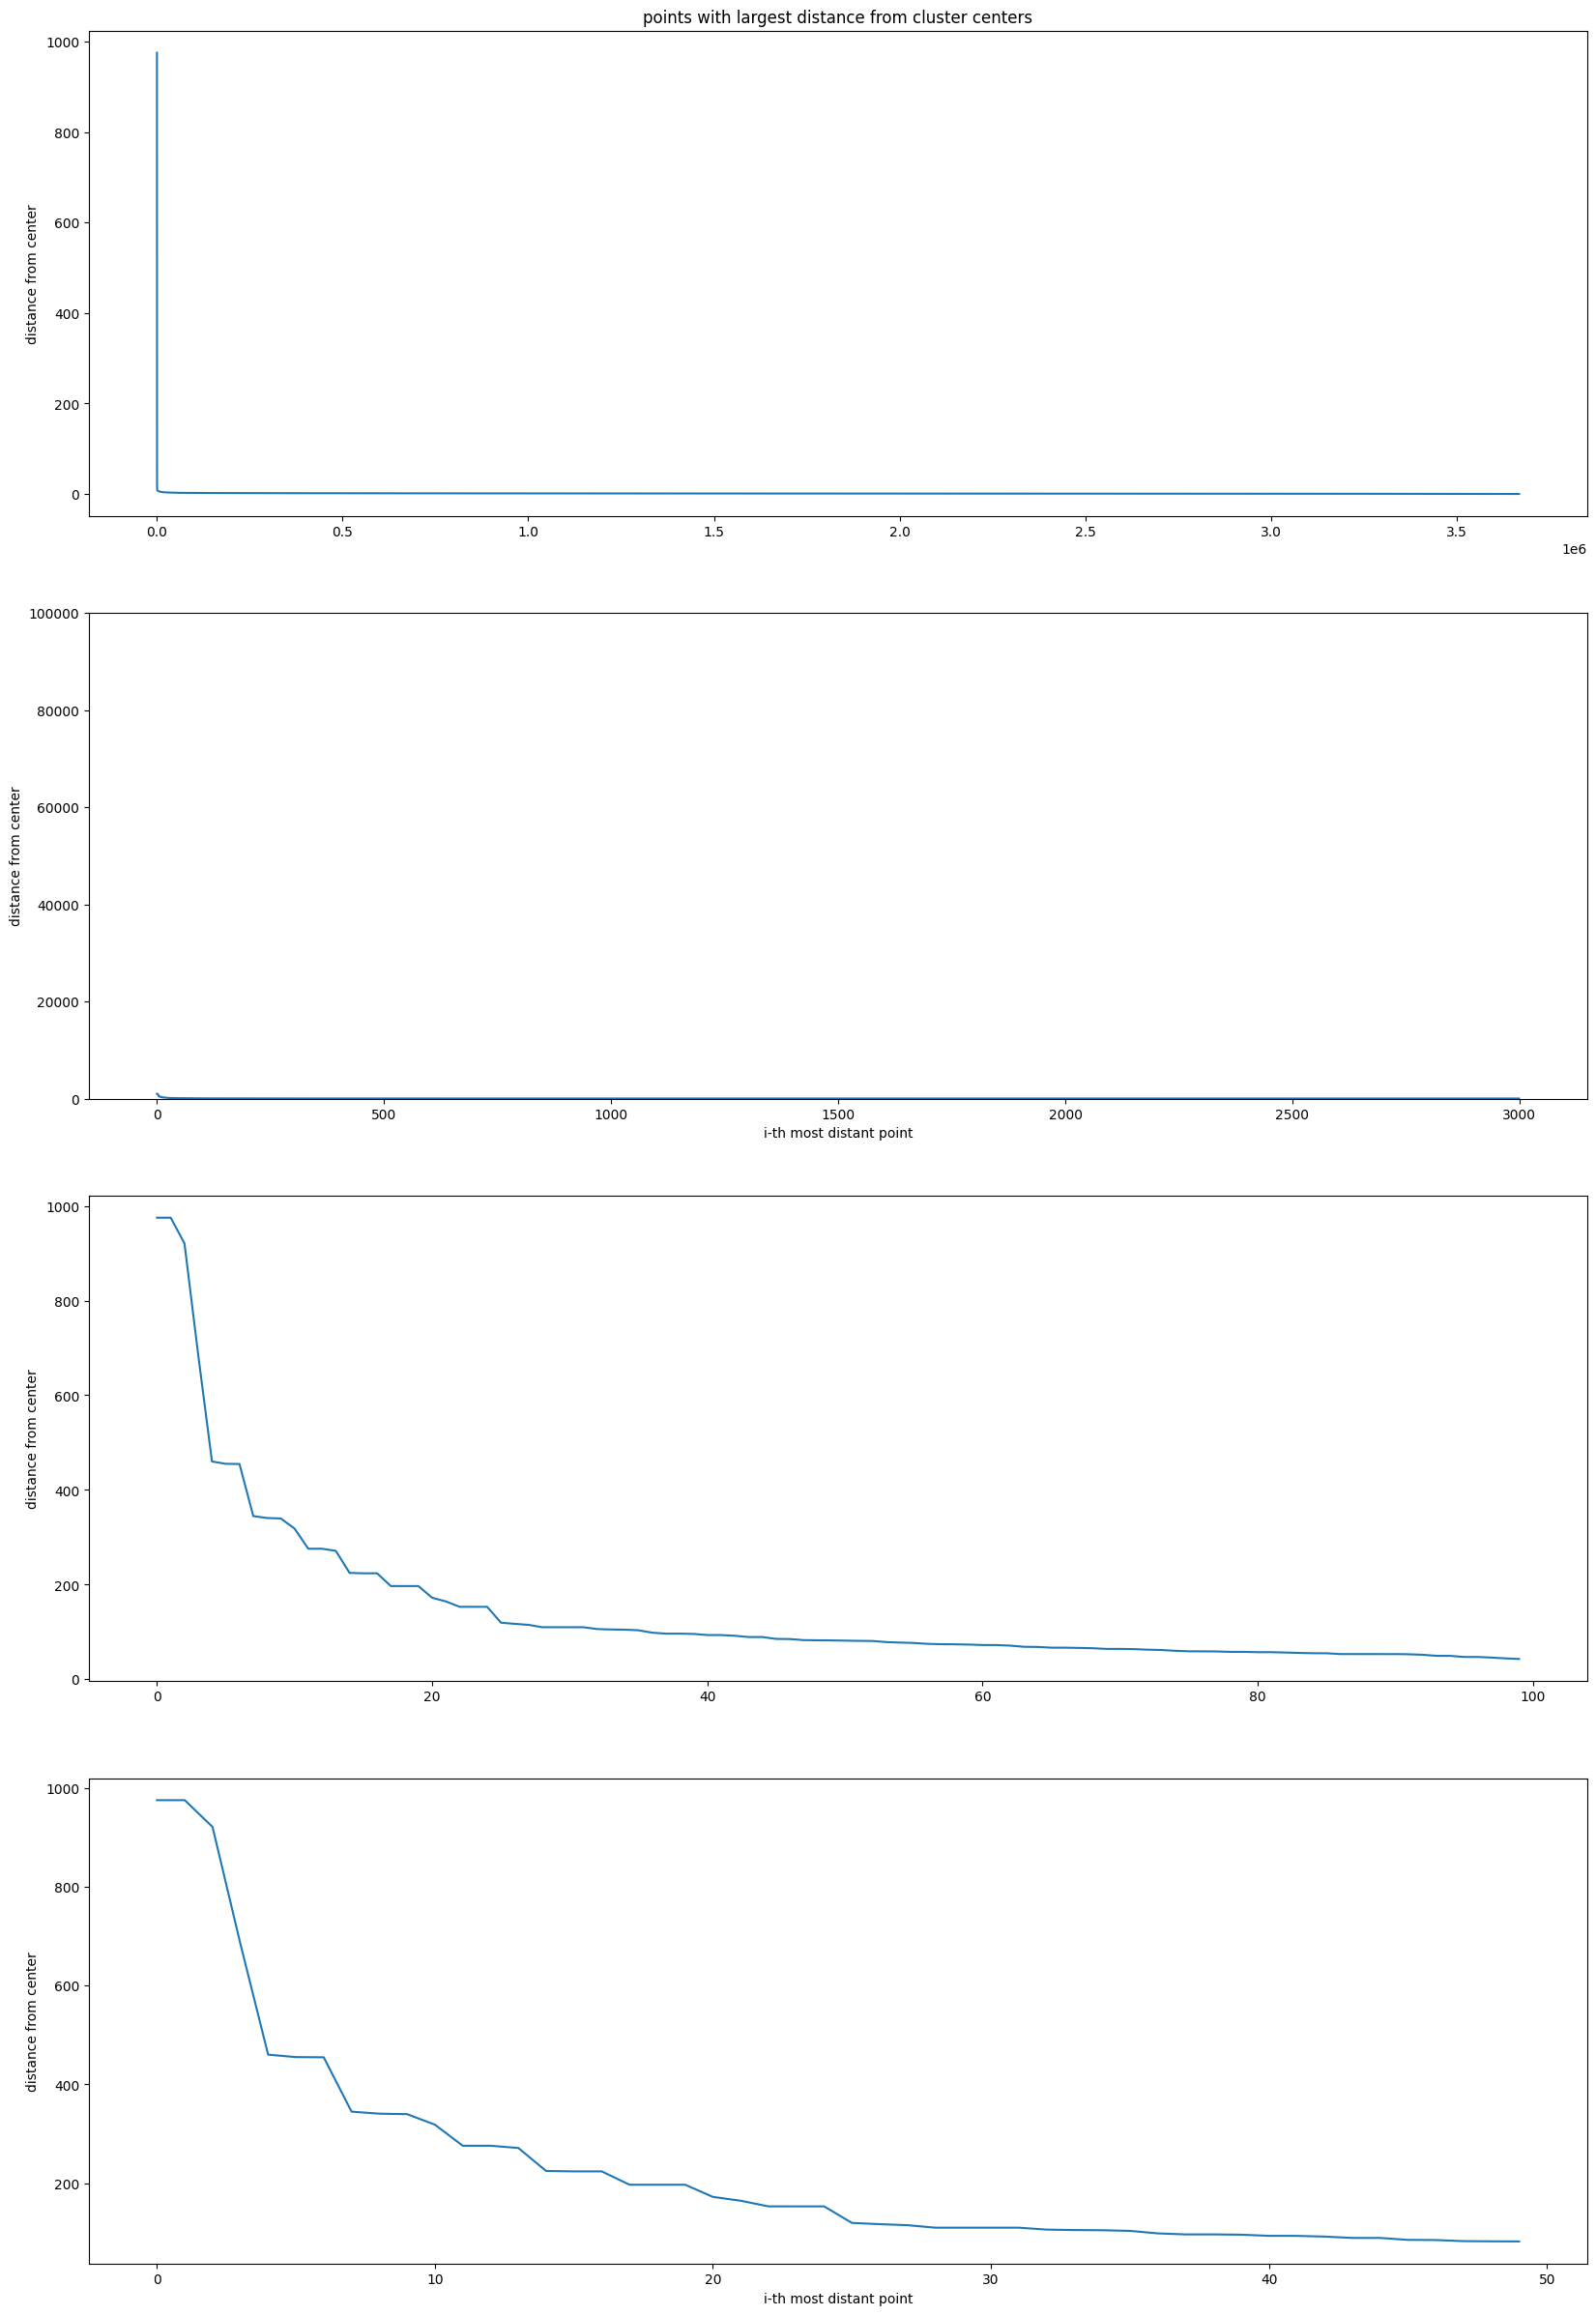

In [63]:
xx = [x[0] for x in ordered]
plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
plt.plot(xx)
plt.title("points with largest distance from cluster centers")
plt.ylabel("distance from center")

plt.subplot(4,1,2)
plt.plot(xx[:3000])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.ylim(0,100000)

plt.subplot(4,1,3)
plt.plot(xx[:100])
plt.ylabel("distance from center")

plt.subplot(4,1,4)
plt.plot(xx[:50])
plt.ylabel("distance from center")
plt.xlabel("i-th most distant point")
plt.show()

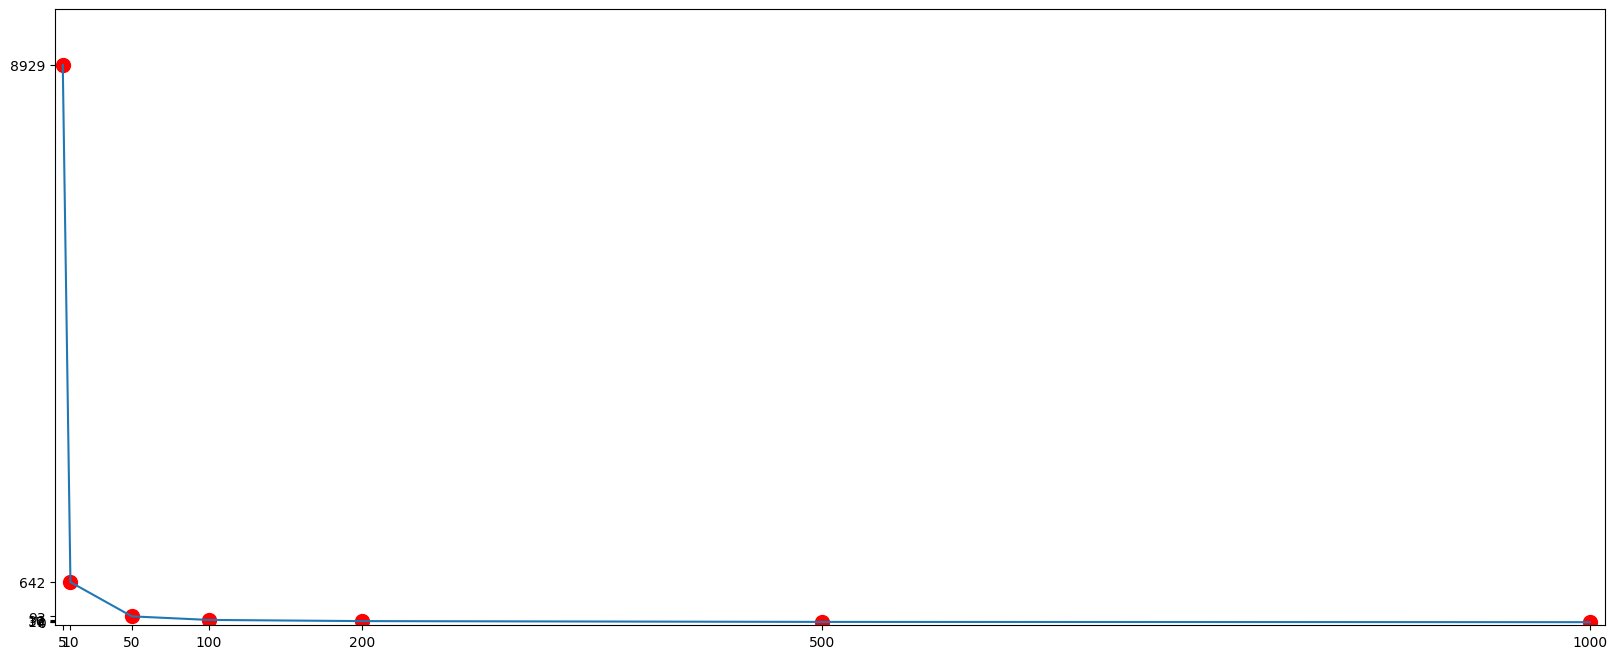

Threshold:       1000	anomalous connections:     0
Threshold:        500	anomalous connections:     4
Threshold:        200	anomalous connections:    17
Threshold:        100	anomalous connections:    36
Threshold:         50	anomalous connections:    93
Threshold:         10	anomalous connections:   642
Threshold:          5	anomalous connections:  8929


In [64]:
thresholds = [1000, 500, 200, 100, 50, 10, 5]
t_count = [len([__ for __ in xx if __ > _]) for _ in thresholds]

plt.figure(figsize=(20,8))
plt.scatter(thresholds, t_count, c="r", s=100)
plt.plot(thresholds, t_count)
plt.yticks(t_count)
plt.xticks(thresholds)
plt.ylim(-50, np.max(t_count)*1.1)
plt.xlim(0, np.max(thresholds)*1.01)
plt.show()

for i in range(len(thresholds)):
    print("Threshold: %10d\tanomalous connections: %5d" %(thresholds[i], t_count[i]))

In [65]:
currThre = 5
i = 0
ynonreduced = labelsAndDataNorm.map(lambda x : (x[0], error(predictions, x[1])))
ynonreduced = ynonreduced.apply(lambda x : x if x[1] > currThre else np.nan).dropna()
ynonreduced = ynonreduced.map(lambda x : (x[0], 1))
y = defaultdict(int)
for key, value in ynonreduced:
    y[key] += value
y = pd.DataFrame(y.items()).sort_values(by=1, ascending=False)
y

,0,1
3,Reconnaissance,6604
1,DDoS,1520
2,Normal,476
0,DoS,322
4,Theft,7


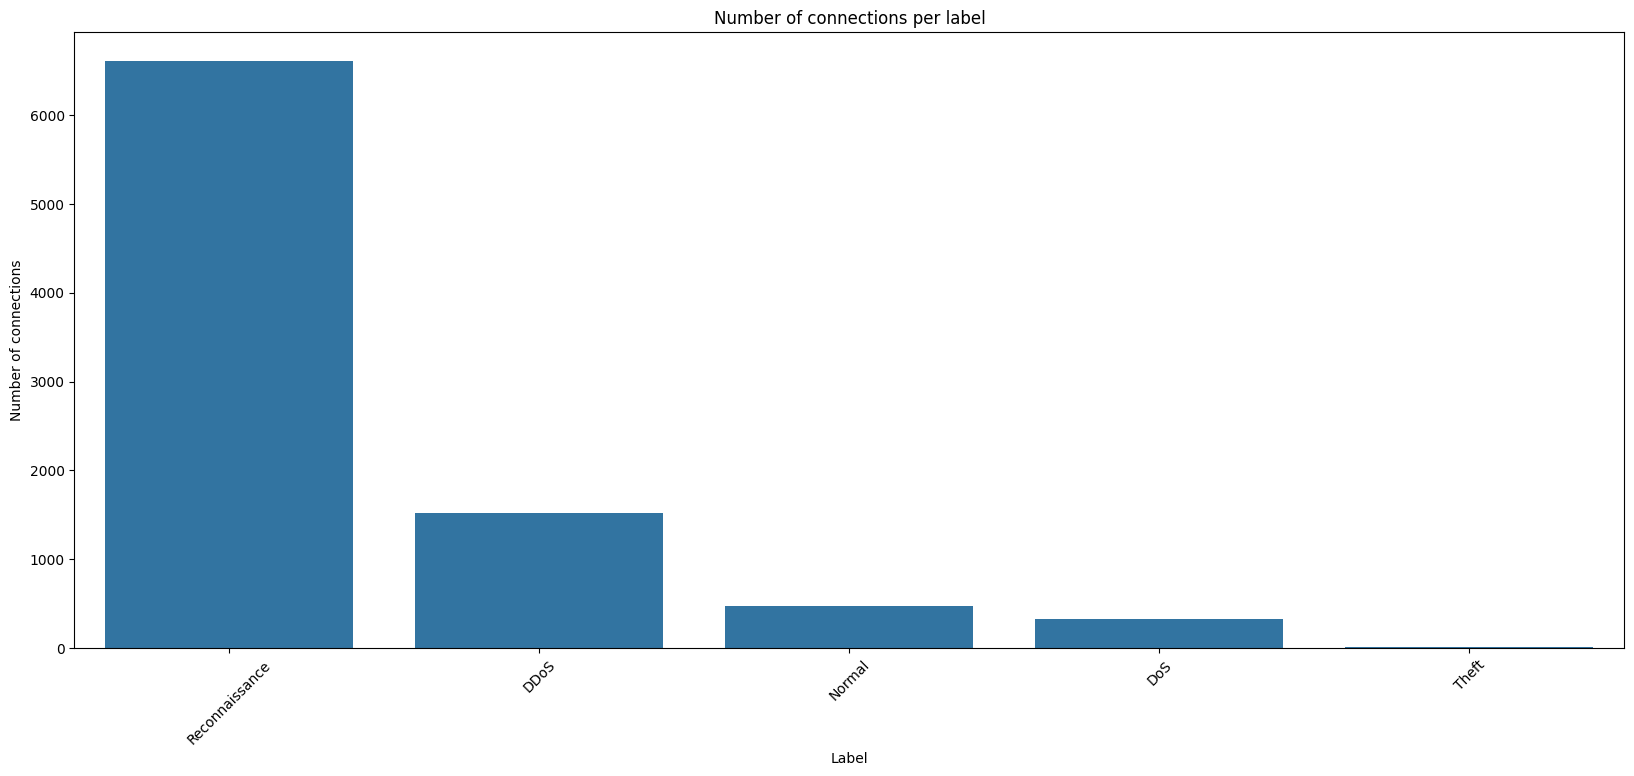

In [66]:
plt.figure(figsize=(20,8))
sns.barplot(x=np.arange(len(y)), y=y[1])
plt.xticks(np.arange(len(y)), y[0], rotation=45)
plt.xlabel("Label")
plt.ylabel("Number of connections")
plt.title("Number of connections per label")
plt.show()

In [67]:
currThre = 100
i = 0
ynonreduced = labelsAndDataNorm.map(lambda x : (x[0], error(predictions, x[1])))
ynonreduced = ynonreduced.apply(lambda x : x if x[1] > currThre else np.nan).dropna()
ynonreduced = ynonreduced.map(lambda x : (x[0], 1))
y = defaultdict(int)
for key, value in ynonreduced:
    y[key] += value
y = pd.DataFrame(y.items()).sort_values(by=1, ascending=False)
y

,0,1
1,Reconnaissance,24
0,Normal,12


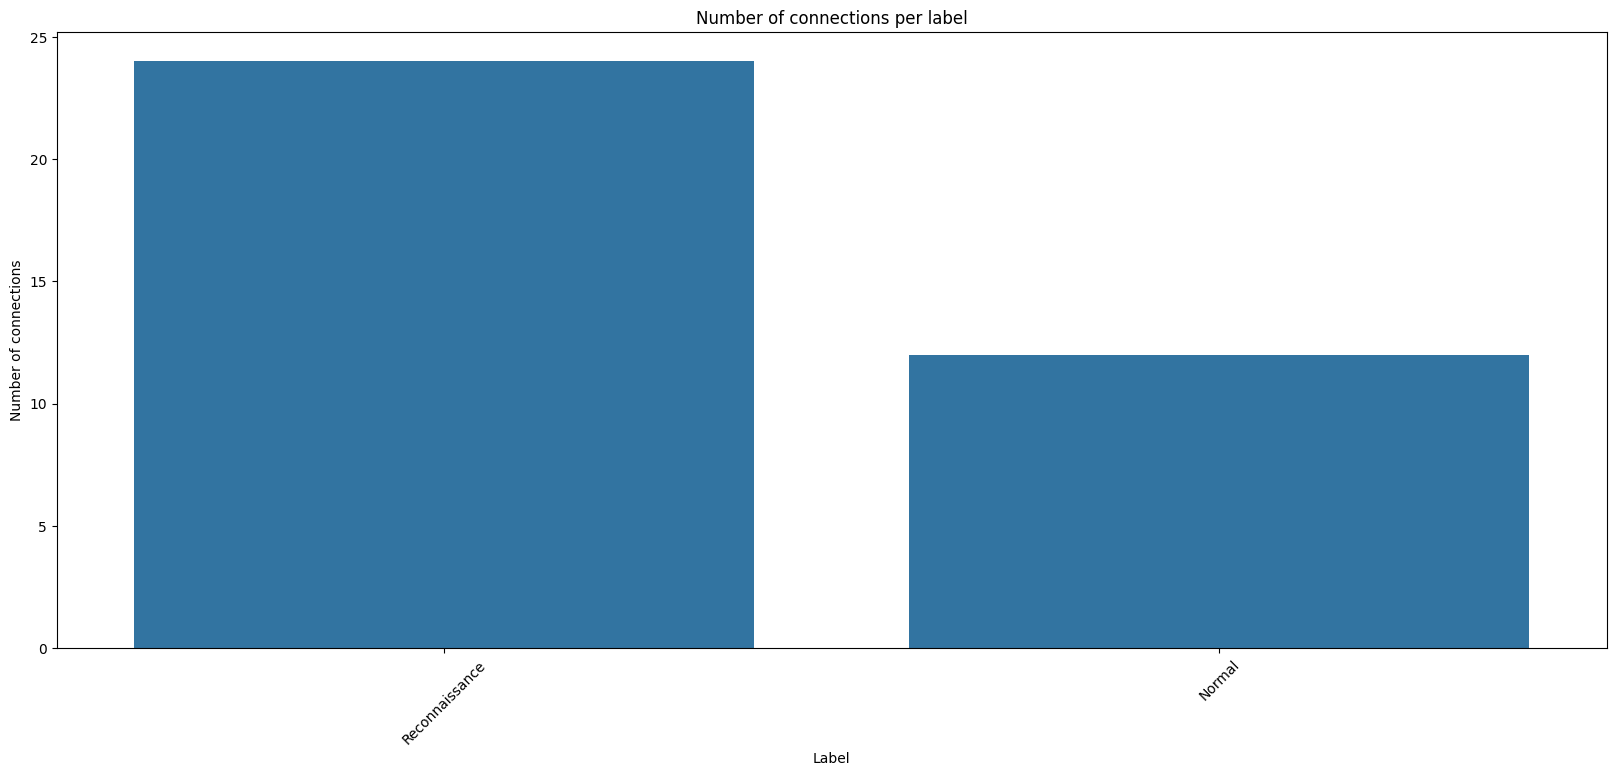

In [68]:
plt.figure(figsize=(20,8))
sns.barplot(x=np.arange(len(y)), y=y[1])
plt.xticks(np.arange(len(y)), y[0], rotation=45)
plt.xlabel("Label")
plt.ylabel("Number of connections")
plt.title("Number of connections per label")
plt.show()